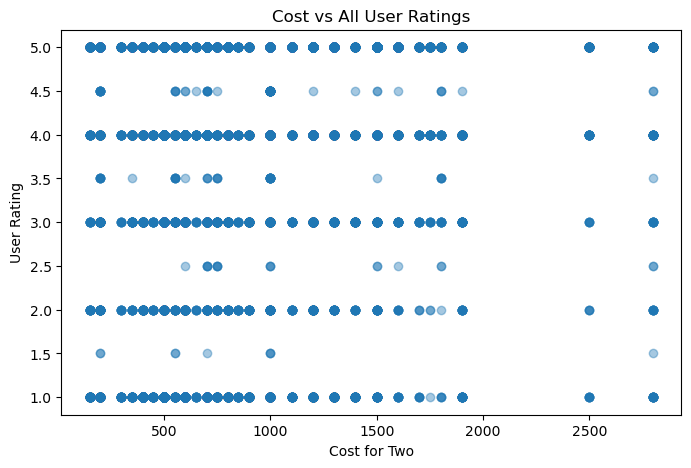

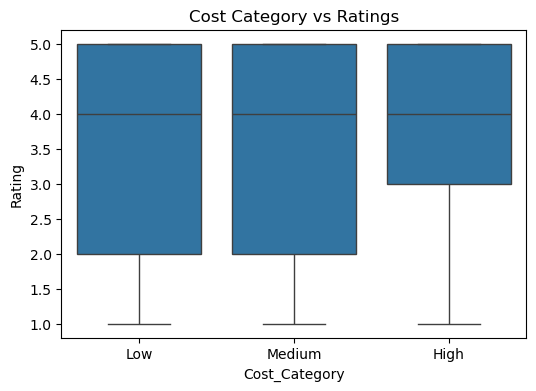

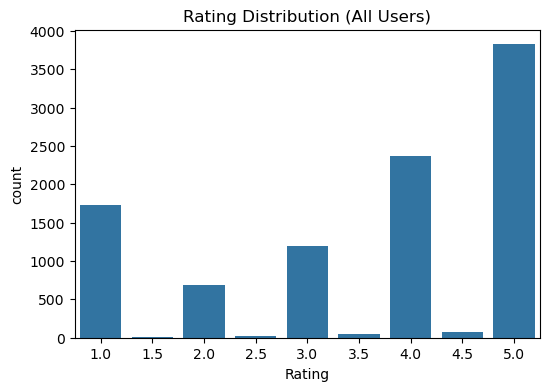

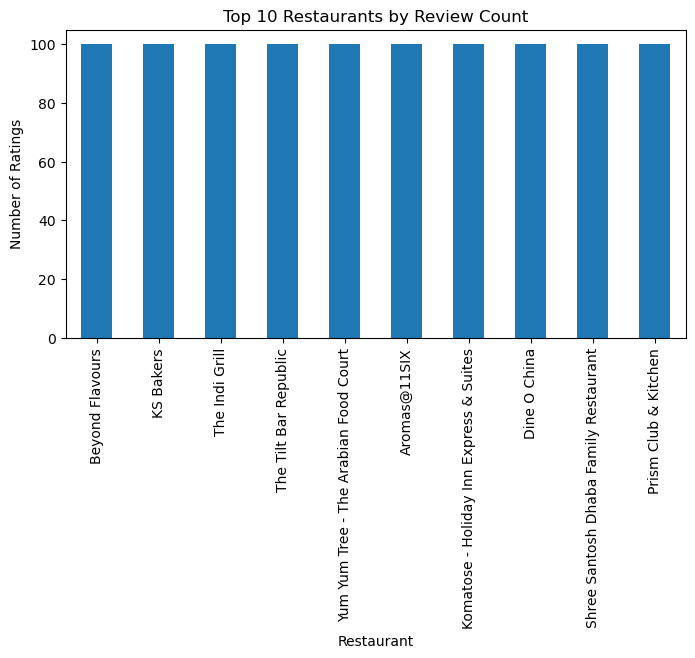

Accuracy: 0.8141637368156706

Classification Report:

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       508
     Neutral       0.42      0.12      0.18       233
    Positive       0.84      0.96      0.90      1250

    accuracy                           0.81      1991
   macro avg       0.68      0.62      0.62      1991
weighted avg       0.78      0.81      0.78      1991

ML Model trained using ALL user ratings and reviews


In [15]:
# =====================================
# 1. IMPORT LIBRARIES
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# =====================================
# 2. LOAD DATA
# =====================================
reviews = pd.read_csv("Zomato Restaurant reviews.csv")
meta = pd.read_csv("Zomato Restaurant names and Metadata.csv")


# =====================================
# 3. CLEAN RATING
# =====================================
reviews["Rating"] = pd.to_numeric(reviews["Rating"], errors="coerce")
reviews = reviews.dropna(subset=["Rating", "Review", "Restaurant"])


# =====================================
# 4. CLEAN COST
# =====================================
meta["Cost"] = meta["Cost"].astype(str).str.replace(r"[^0-9]", "", regex=True)
meta["Cost"] = pd.to_numeric(meta["Cost"], errors="coerce")
meta = meta.dropna(subset=["Cost", "Name"])


# =====================================
# 5. MERGE (ALL RATINGS KEPT ⭐)
# =====================================
final_df = pd.merge(
    reviews,
    meta,
    left_on="Restaurant",
    right_on="Name",
    how="inner"
)


# =====================================
# 6. COST CATEGORY
# =====================================
final_df["Cost_Category"] = pd.cut(
    final_df["Cost"],
    bins=[0, 300, 700, 2000],
    labels=["Low", "Medium", "High"]
)


# =====================================
# 7. GRAPHS – ALL RATINGS
# =====================================

# Cost vs All Ratings
plt.figure(figsize=(8,5))
plt.scatter(final_df["Cost"], final_df["Rating"], alpha=0.4)
plt.xlabel("Cost for Two")
plt.ylabel("User Rating")
plt.title("Cost vs All User Ratings")
plt.show()

# Cost Category vs Ratings
plt.figure(figsize=(6,4))
sns.boxplot(x="Cost_Category", y="Rating", data=final_df)
plt.title("Cost Category vs Ratings")
plt.show()

# Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=final_df)
plt.title("Rating Distribution (All Users)")
plt.show()

# Top 10 Restaurants by Number of Ratings
top_rest = final_df["Restaurant"].value_counts().head(10)
plt.figure(figsize=(8,4))
top_rest.plot(kind="bar")
plt.title("Top 10 Restaurants by Review Count")
plt.ylabel("Number of Ratings")
plt.show()


# =====================================
# 8. NLP – CLEAN REVIEW TEXT
# =====================================
def clean_text(text):
    text = re.sub("[^a-zA-Z]", " ", str(text))
    return text.lower()

final_df["clean_review"] = final_df["Review"].apply(clean_text)


# =====================================
# 9. CREATE SENTIMENT LABEL (ML TARGET)
# =====================================
def sentiment_label(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

final_df["Sentiment"] = final_df["Rating"].apply(sentiment_label)


# =====================================
# 10. TF-IDF FEATURES
# =====================================
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X = tfidf.fit_transform(final_df["clean_review"])
y = final_df["Sentiment"]


# =====================================
# 11. TRAIN-TEST SPLIT
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =====================================
# 12. ML MODEL – LOGISTIC REGRESSION
# =====================================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# =====================================
# 13. MODEL EVALUATION
# =====================================
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


# =====================================
# 14. PROJECT DONE 🎉
# =====================================
print("ML Model trained using ALL user ratings and reviews")
